## Un cuento de dos ciudades

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)
from matplotlib import pyplot as plt
%matplotlib inline
from google.cloud import bigquery
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="../utility-vista-307720-6cec755818c9.json"
client = bigquery.Client()
%load_ext google.cloud.bigquery
import seaborn as sns

### Extracting Phoenix ACS data from years 2015-2017 from Google BigQuery

In [2]:
%%bigquery acs_phoenix_zip_codes_2015_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2015_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173');

Downloading: 100%|██████████| 130/130 [00:02<00:00, 64.64rows/s]


In [3]:
%%bigquery acs_phoenix_zip_codes_2016_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2016_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173');

Downloading: 100%|██████████| 130/130 [00:02<00:00, 59.25rows/s]


In [4]:
%%bigquery acs_phoenix_zip_codes_2017_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2017_5yr`
WHERE geo_id in ('85032', '85281', '85225', '85308', '85142', '85251', '85282',
       '85383', '85204', '85345', '85301', '85022', '85008', '85255',
       '85201', '85326', '85351', '85338', '85205', '85374', '85254',
       '85248', '85207', '85122', '85016', '85224', '85283', '85209',
       '85018', '85382', '85260', '85044', '85029', '85041', '85206',
       '85234', '85020', '85295', '85208', '85021', '85202', '85296',
       '85249', '85286', '85027', '85226', '85015', '85051', '85086',
       '85033', '85120', '85302', '85210', '85138', '85035', '85379',
       '85042', '85233', '85213', '85037', '85257', '85023', '85339',
       '85212', '85143', '85140', '85048', '85014', '85323', '85395',
       '85392', '85268', '85203', '85050', '85009', '85331', '85017',
       '85053', '85340', '85353', '85396', '85119', '85024', '85132',
       '85335', '85013', '85085', '85040', '85381', '85304', '85303',
       '85388', '85306', '85006', '85373', '85250', '85043', '85215',
       '85028', '85031', '85019', '85284', '85262', '85118', '85139',
       '85310', '85083', '85266', '85128', '85007', '85305', '85004',
       '85003', '85131', '85390', '85012', '85355', '85123', '85087',
       '85378', '85307', '85194', '85363', '85045', '85361', '85623',
       '85034', '85263', '85377', '85631', '85173');

Downloading: 100%|██████████| 130/130 [00:02<00:00, 54.51rows/s]


In [5]:
acs_phoenix_zip_codes_2015_5yr["Year"]=2015
acs_phoenix_zip_codes_2016_5yr["Year"]=2016
acs_phoenix_zip_codes_2017_5yr["Year"]=2017
acs_phoenix_cols_2015=acs_phoenix_zip_codes_2015_5yr.columns
acs_phoenix_cols_2016=acs_phoenix_zip_codes_2016_5yr.columns
acs_phoenix_cols_2017=acs_phoenix_zip_codes_2017_5yr.columns
acs_phoenix_cols_2017.tolist().index('pop_separated')
common_columns=list((((
(set(acs_phoenix_cols_2015))).intersection(set(acs_phoenix_cols_2016)))
                    .intersection(set(acs_phoenix_cols_2017))))
frames=[acs_phoenix_zip_codes_2015_5yr[common_columns],
        acs_phoenix_zip_codes_2016_5yr[common_columns],
        acs_phoenix_zip_codes_2017_5yr[common_columns]]
acs_all_phoenix=pd.concat(frames)

In [6]:
acs_all_phoenix.head()
acs_all_phoenix.shape

(390, 247)

#### Calculating the extent of missingness in the data we have collected from 2015-2017

In [7]:
missingRowsACS = pd.isnull(acs_all_phoenix).sum(axis=1) > 0
missingColsACS = pd.isnull(acs_all_phoenix).sum(axis=0) > 0
print(missingColsACS.sum())
print(missingRowsACS.sum())

8
268


In [8]:
#Drop columns that have missing data for 2 or more zipcodes
for col in acs_all_phoenix.columns[missingColsACS]:
    if pd.isnull(acs_all_phoenix[col]).sum()>=0: 
        print(f"Dropping {col} from ACS")
        acs_all_phoenix.drop(col,axis=1,inplace=True)

Dropping percent_income_spent_on_rent from ACS
Dropping speak_only_english_at_home from ACS
Dropping aggregate_travel_time_to_work from ACS
Dropping speak_spanish_at_home_low_english from ACS
Dropping pop_5_years_over from ACS
Dropping renter_occupied_housing_units_paying_cash_median_gross_rent from ACS
Dropping median_rent from ACS
Dropping speak_spanish_at_home from ACS


In [9]:
acs_all_phoenix.shape

(390, 239)

In [10]:
acs_all_phoenix = acs_all_phoenix.reindex(sorted(acs_all_phoenix.columns), axis=1)

### Extracting Tampa ACS data from years 2015-2017 from Google BigQuery

In [11]:
%%bigquery acs_tampa_zip_codes_2015_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2015_5yr`
WHERE geo_id in ('33647', '33511', '33578', '34668', '34698', '33614', '34655',
       '33615', '33617', '33612', '34667', '34609', '33610', '33624',
       '33771', '33573', '33611', '33702', '34653', '33604', '33613',
       '33707', '33710', '33756', '33764', '34683', '33619', '33713',
       '34684', '33709', '33705', '34608', '34652', '33770', '34689',
       '34606', '33594', '33579', '33542', '33626', '33618', '33543',
       '33772', '33781', '33541', '33701', '33703', '33607', '33712',
       '33510', '33570', '33755', '34691', '33625', '33629', '34639',
       '33556', '33563', '34677', '33706', '33763', '33708', '33596',
       '33558', '34601', '34638', '34654', '33716', '33584', '33547',
       '33782', '33602', '33544', '34613', '33569', '33606', '33572',
       '33774', '33761', '33714', '33759', '33609', '33773', '34695',
       '33603', '33711', '33634', '33598', '33760', '33704', '33566',
       '33767', '34685', '33635', '33525', '33777', '33637', '33778',
       '33605', '33545', '33616', '33565', '33549', '33523', '33559',
       '33765', '33715', '33534', '34669', '34610', '33527', '33776',
       '33540', '33592', '34607', '34688', '33785', '33567', '33597',
       '33548', '34602', '33762', '34614', '34637', '33576');

Downloading: 100%|██████████| 125/125 [00:01<00:00, 68.26rows/s]


In [12]:
%%bigquery acs_tampa_zip_codes_2016_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2016_5yr`
WHERE geo_id in ('33647', '33511', '33578', '34668', '34698', '33614', '34655',
       '33615', '33617', '33612', '34667', '34609', '33610', '33624',
       '33771', '33573', '33611', '33702', '34653', '33604', '33613',
       '33707', '33710', '33756', '33764', '34683', '33619', '33713',
       '34684', '33709', '33705', '34608', '34652', '33770', '34689',
       '34606', '33594', '33579', '33542', '33626', '33618', '33543',
       '33772', '33781', '33541', '33701', '33703', '33607', '33712',
       '33510', '33570', '33755', '34691', '33625', '33629', '34639',
       '33556', '33563', '34677', '33706', '33763', '33708', '33596',
       '33558', '34601', '34638', '34654', '33716', '33584', '33547',
       '33782', '33602', '33544', '34613', '33569', '33606', '33572',
       '33774', '33761', '33714', '33759', '33609', '33773', '34695',
       '33603', '33711', '33634', '33598', '33760', '33704', '33566',
       '33767', '34685', '33635', '33525', '33777', '33637', '33778',
       '33605', '33545', '33616', '33565', '33549', '33523', '33559',
       '33765', '33715', '33534', '34669', '34610', '33527', '33776',
       '33540', '33592', '34607', '34688', '33785', '33567', '33597',
       '33548', '34602', '33762', '34614', '34637', '33576');

Downloading: 100%|██████████| 125/125 [00:01<00:00, 77.86rows/s]


In [13]:
%%bigquery acs_tampa_zip_codes_2017_5yr
SELECT *
FROM
    `bigquery-public-data.census_bureau_acs.zip_codes_2017_5yr`
WHERE geo_id in ('33647', '33511', '33578', '34668', '34698', '33614', '34655',
       '33615', '33617', '33612', '34667', '34609', '33610', '33624',
       '33771', '33573', '33611', '33702', '34653', '33604', '33613',
       '33707', '33710', '33756', '33764', '34683', '33619', '33713',
       '34684', '33709', '33705', '34608', '34652', '33770', '34689',
       '34606', '33594', '33579', '33542', '33626', '33618', '33543',
       '33772', '33781', '33541', '33701', '33703', '33607', '33712',
       '33510', '33570', '33755', '34691', '33625', '33629', '34639',
       '33556', '33563', '34677', '33706', '33763', '33708', '33596',
       '33558', '34601', '34638', '34654', '33716', '33584', '33547',
       '33782', '33602', '33544', '34613', '33569', '33606', '33572',
       '33774', '33761', '33714', '33759', '33609', '33773', '34695',
       '33603', '33711', '33634', '33598', '33760', '33704', '33566',
       '33767', '34685', '33635', '33525', '33777', '33637', '33778',
       '33605', '33545', '33616', '33565', '33549', '33523', '33559',
       '33765', '33715', '33534', '34669', '34610', '33527', '33776',
       '33540', '33592', '34607', '34688', '33785', '33567', '33597',
       '33548', '34602', '33762', '34614', '34637', '33576');

Downloading: 100%|██████████| 125/125 [00:01<00:00, 77.23rows/s]


In [14]:
acs_tampa_zip_codes_2015_5yr["Year"]=2015
acs_tampa_zip_codes_2016_5yr["Year"]=2016
acs_tampa_zip_codes_2017_5yr["Year"]=2017
acs_tampa_cols_2015=acs_tampa_zip_codes_2015_5yr.columns
acs_tampa_cols_2016=acs_tampa_zip_codes_2016_5yr.columns
acs_tampa_cols_2017=acs_tampa_zip_codes_2017_5yr.columns
acs_tampa_cols_2017.tolist().index('pop_separated')
common_columns_tampa=list((((
(set(acs_tampa_cols_2015))).intersection(set(acs_tampa_cols_2016)))
                    .intersection(set(acs_tampa_cols_2017))))
frames=[acs_tampa_zip_codes_2015_5yr[common_columns],
        acs_tampa_zip_codes_2016_5yr[common_columns],
        acs_tampa_zip_codes_2017_5yr[common_columns]]
acs_all_tampa=pd.concat(frames)

In [15]:
zriall=pd.read_csv("Zip_Zri_AllHomesPlusMultifamily.csv")
zriall.rename(columns={"RegionName":"zipcode"},inplace=True)
missingMetros = pd.isnull(zriall["Metro"])
zriall=zriall[~missingMetros]
zriall.rename(columns={"RegionName":"zipcode"},inplace=True)
phoenixzri = zriall[(zriall.Metro.str.contains('Phoenix')) | (zriall.Metro.str.contains('Tampa'))]
print(phoenixzri.shape)

missingRowsAll = pd.isnull(phoenixzri).sum(axis=1) > 0
missingColsAll = pd.isnull(phoenixzri).sum(axis=0) > 0

#Dropping columns with more than 1/2 of a zipcode's data missing
for col in phoenixzri.columns[missingColsAll]:
    if pd.isnull(phoenixzri[col]).sum()>15:
        print(f"Dropping {col} from All")
        phoenixzri.drop(col,axis=1,inplace=True)

#Dropping zipcodes with more than 40% of index data missing
phoenixzri = phoenixzri[pd.isnull(phoenixzri).sum(axis=1)<50]
phoenixzri['zipcode'].unique().astype(str)

(256, 120)
Dropping 2010-10 from All


/Users/chitrasharathchandra/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


array(['85032', '85281', '85225', '85308', '33647', '85142', '85251',
       '85282', '85383', '33511', '85204', '85345', '85301', '85022',
       '33578', '85008', '85255', '34668', '85201', '85326', '34698',
       '85351', '85338', '85205', '85374', '85254', '85248', '85207',
       '33614', '85122', '34655', '85016', '85224', '33615', '33617',
       '85283', '33612', '85209', '85018', '85382', '85260', '85044',
       '85029', '85041', '85206', '85234', '34667', '34609', '85020',
       '85295', '85208', '85021', '85202', '85296', '85249', '85286',
       '85027', '33610', '85226', '85015', '33624', '33771', '85051',
       '33573', '33611', '85086', '85033', '85120', '85302', '85210',
       '85138', '33702', '34653', '33604', '85035', '33613', '85379',
       '33707', '85042', '85233', '85213', '33710', '85037', '85257',
       '33756', '85023', '85339', '85212', '33764', '34683', '33619',
       '33713', '85143', '85140', '34684', '33709', '85048', '33705',
       '85014', '853

### Demographics

## Age

In [16]:
def age(df):
    df=df.copy()
    female_under_18 = df.female_under_5 + df.female_5_to_9 + df.female_10_to_14 + df.female_15_to_17 + df.female_18_to_19
    female_under_60 = df.female_20 + df.female_21 + df.female_22_to_24 + df.female_25_to_29 + df.female_30_to_34 + df.female_35_to_39 + df.female_40_to_44 + df.female_45_to_49 + df.female_50_to_54 + df.female_55_to_59 
    female_over_60 = df.female_60_to_61 + df.female_62_to_64 + df.female_65_to_66 + df.female_67_to_69 
    female_under_18 = female_under_18.astype(float)
    female_under_60 = female_under_60.astype(float)
    female_over_60 = female_over_60.astype(float)
    male_under_18 = df.male_under_5 + df.male_5_to_9 + df.male_10_to_14 + df.male_15_to_17 + df.male_18_to_19
    male_under_60 = df.male_20 + df.male_21 + df.male_22_to_24 + df.male_25_to_29 + df.male_30_to_34 + df.male_35_to_39 + df.male_40_to_44 + df.male_45_to_49 + df.male_50_to_54 + df.male_55_to_59 
    male_over_60 = df.male_60_61 + df.male_62_64 + df.male_65_to_66 + df.male_67_to_69 + df.male_70_to_74 + df.male_75_to_79 + df.male_80_to_84 + df.male_85_and_over
    under_18=female_under_18.astype(float)+male_under_18.astype(float)
    under_60=female_under_60.astype(float)+male_under_60.astype(float)
    over_60=female_over_60.astype(float)+male_over_60.astype(float)
    total_pop_year=df['total_pop'].astype(float).sum()
    return (round(under_18.sum()/total_pop_year*100),round(under_60.sum()/total_pop_year*100),round(over_60.sum()/total_pop_year*100))

<ipython-input-116-148037ea58c2>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=plt.axes()
<ipython-input-116-148037ea58c2>:31: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2=plt.axes()
<ipython-input-116-148037ea58c2>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returne

Text(0, 0.5, 'Percentage of Population')

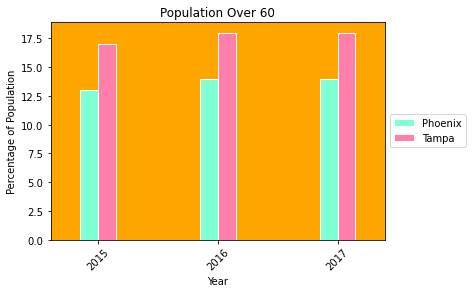

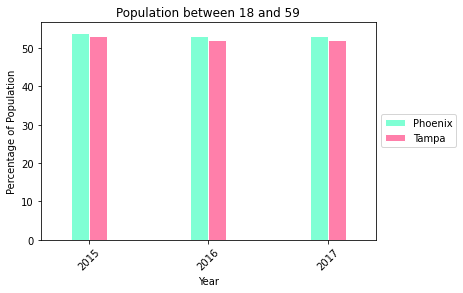

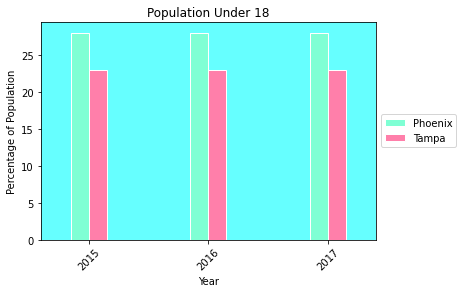

In [116]:
phoenix_over_60=[]
tampa_over_60=[]
phoenix_under_60=[]
tampa_under_60=[]
phoenix_under_18=[]
tampa_under_18=[]
age_over_60_sns=pd.DataFrame()
for year in range(2015,2018):
    under_18_phoenix,under_60_phoenix,over_60_phoenix=age(acs_all_phoenix[acs_all_phoenix["Year"]==year])
    under_18_tampa,under_60_tampa,over_60_tampa=age(acs_all_tampa[acs_all_tampa["Year"]==year])
    phoenix_over_60.append(over_60_phoenix)
    tampa_over_60.append(over_60_tampa)
    phoenix_under_60.append(under_60_phoenix)
    tampa_under_60.append(under_60_tampa)
    phoenix_under_18.append(under_18_phoenix)
    tampa_under_18.append(under_18_tampa)
#     age_over_60_sns=age_over_60_sns.append({"Year":str(year),"Ciudad":"Phoenix","Count":over_60_phoenix},ignore_index=True)
#     age_over_60_sns=age_over_60_sns.append({"Year":str(year),"Ciudad":"Tampa","Count":over_60_tampa},ignore_index=True)
age_over_60=pd.DataFrame({'Phoenix':phoenix_over_60,'Tampa':tampa_over_60},index=['2015','2016','2017'])

age_over_60.plot.bar(rot=45,color=["#7FFFD4","#ff7faa"],edgecolor="white",width=0.3)
ax1=plt.axes()
ax1.set_facecolor("orange")
plt.title('Population Over 60', color='black')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Year")
plt.ylabel("Percentage of Population")

age_under_60=pd.DataFrame({'Phoenix':phoenix_under_60,'Tampa':tampa_under_60},index=['2015','2016','2017'])
age_under_60.plot.bar(rot=45,color=["#7FFFD4","#ff7faa"],edgecolor="white",width=0.3)
ax2=plt.axes()
ax2.set_facecolor("white")
plt.title('Population between 18 and 59', color='black')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Year")
plt.ylabel("Percentage of Population")

age_under_18=pd.DataFrame({'Phoenix':phoenix_under_18,'Tampa':tampa_under_18},index=['2015','2016','2017'])
age_under_18.plot.bar(rot=45,color=["#7FFFD4","#ff7faa"],edgecolor="white",width=0.3)
ax3=plt.axes()
ax3.set_facecolor("#66ffff")
plt.title('Population Under 18', color='black')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Year")
plt.ylabel("Percentage of Population")

# ax = sns.barplot(x="Year", y="Count", hue="Ciudad", data=age_over_60_sns, palette=["#7FFFD4","#ff7faa"])
# plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


In [111]:
under_18=[]
between_19_60=[]
above_60=[]
age_over_60_sns=pd.DataFrame()
for year in range(2015,2018):
    under_18_phoenix,under_60_phoenix,over_60_phoenix=age(acs_all_phoenix[acs_all_phoenix["Year"]==year])
    under_18_tampa,under_60_tampa,over_60_tampa=age(acs_all_tampa[acs_all_tampa["Year"]==year])
    under_18.append(under_18_phoenix)
    under_18.append(under_18_tampa)
    between_19_60.append(under_60_phoenix)
    between_19_60.append(under_60_tampa)
    above_60.append(over_60_phoenix)
    above_60.append(over_60_tampa)
df_age=pd.DataFrame({'City':["Phoenix","Tampa"]*3,
                     'Year':[2015,2017,2018]*2,
                     'Under 18':under_18,
                    'Between 19 and 60':between_19_60,
                    'Above 60':above_60})
df_age

,City,Year,Under 18,Between 19 and 60,Above 60
0,Phoenix,2015,28,54,13
1,Tampa,2017,23,53,17
2,Phoenix,2018,28,53,14
3,Tampa,2015,23,52,18
4,Phoenix,2017,28,53,14
5,Tampa,2018,23,52,18


## Commute

<ipython-input-122-4173c45c276d>:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1=plt.axes()


Text(0, 0.5, 'Percentage of Population')

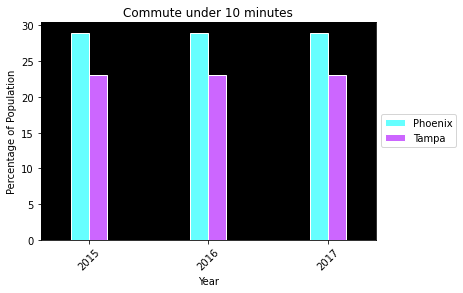

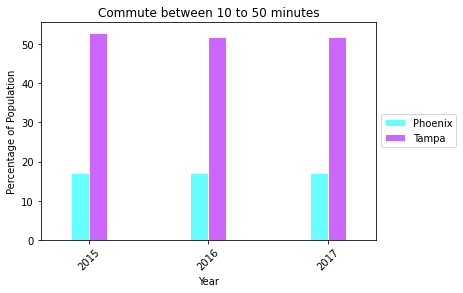

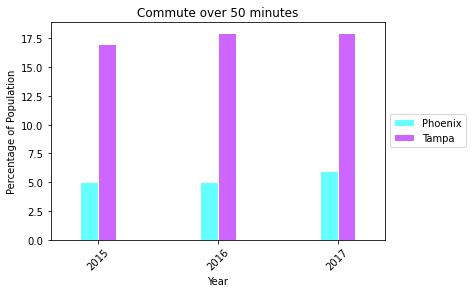

In [122]:
def commute(df):
    df=df.copy()
    commute_less_than_30 = df.commute_5_9_mins + df.commute_less_10_mins + df.commute_10_14_mins + df.commute_15_19_mins + df.commute_20_24_mins + df.commute_25_29_mins
    commute_less_than_60 = df.commute_30_34_mins + df.commute_35_39_mins + df.commute_35_44_mins + df.commute_40_44_mins + df.commute_45_59_mins
    commute_over_60 = df.commute_60_89_mins + df.commute_60_more_mins + df.commute_90_more_mins
    total_pop_year=df['total_pop'].astype(float).sum()
    return (round(commute_less_than_30.astype(float).sum()/total_pop_year*100),
            round(commute_less_than_60.astype(float).sum()/total_pop_year*100),
            round(commute_over_60.astype(float).sum()/total_pop_year*100))
phoenix_under10=[]
tampa_under10=[]
phoenix_tento50=[]
tampa_tento50=[]
phoenix_over50=[]
tampa_over50=[]

for year in range(2015,2018):
    under10_phoenix,tento50_phoenix,over50_phoenix=commute(acs_all_phoenix[acs_all_phoenix["Year"]==year])
    under10_tampa,tento50_tampa,over50_tampa=age(acs_all_tampa[acs_all_tampa["Year"]==year])
    phoenix_under10.append(under10_phoenix)
    tampa_under10.append(under10_tampa)
    phoenix_tento50.append(tento50_phoenix)
    tampa_tento50.append(tento50_tampa)
    phoenix_over50.append(over50_phoenix)
    tampa_over50.append(over50_tampa)

commute_under_10=pd.DataFrame({'Phoenix':phoenix_under10,'Tampa':tampa_under10},index=['2015','2016','2017'])
commute_10_to_50=pd.DataFrame({'Phoenix':phoenix_tento50,'Tampa':tampa_tento50},index=['2015','2016','2017'])
commute_over50=pd.DataFrame({'Phoenix':phoenix_over50,'Tampa':tampa_over50},index=['2015','2016','2017'])


commute_under_10.plot.bar(rot=45, color=["#66ffff","#cc66ff"],edgecolor="white",width=0.3)
ax1=plt.axes()
ax1.set_facecolor("black")
plt.title('Commute under 10 minutes', color='black')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Year")
plt.ylabel("Percentage of Population")

commute_10_to_50.plot.bar(rot=45,color=["#66ffff","#cc66ff"],edgecolor="white",width=0.3)
plt.title('Commute between 10 to 50 minutes', color='black')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Year")
plt.ylabel("Percentage of Population")

commute_over50.plot.bar(rot=45,color=["#66ffff","#cc66ff"],edgecolor="white",width=0.3)
plt.title('Commute over 50 minutes', color='black')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Year")
plt.ylabel("Percentage of Population")

## Rental Index

## Housing inventory

Text(0, 0.5, 'Percentage of Dwellings')

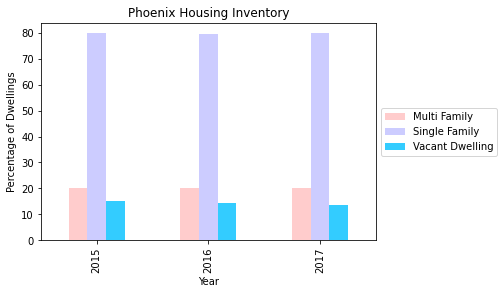

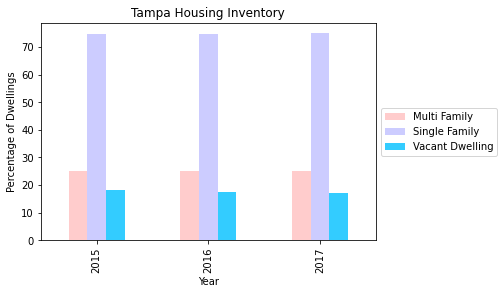

In [118]:
def housing(df):
    df=df.copy()
    sf_dwellings = df.dwellings_1_units_attached + df.dwellings_1_units_detached + df.dwellings_2_units + df.dwellings_3_to_4_units
    mf_dwellings = df.dwellings_5_to_9_units + df.dwellings_10_to_19_units + df.dwellings_20_to_49_units + df.dwellings_50_or_more_units
    total_dwellings = sf_dwellings+mf_dwellings
    vacant_dwellings = df.vacant_housing_units

    return ((sf_dwellings.astype(float).sum()/total_dwellings.astype(float).sum()*100),
           (mf_dwellings.astype(float).sum()/total_dwellings.astype(float).sum()*100),
           (vacant_dwellings.astype(float).sum()/total_dwellings.astype(float).sum()*100))
#https://mf.freddiemac.com/about/multifamily-vs-single-family.html - multifamily is 5 or more units
phoenix_housing_df=pd.DataFrame()
tampa_housing_df=pd.DataFrame()
for year in range(2015,2018):
    sf_dwelling_phoenix,mf_dwelling_phoenix,vacant_dwelling_phoenix=housing(acs_all_phoenix[acs_all_phoenix["Year"]==year])
    sf_dwelling_tampa,mf_dwelling_tampa,vacant_dwelling_tampa=housing(acs_all_tampa[acs_all_tampa["Year"]==year])
    phoenix_housing_df=phoenix_housing_df.append({
        "Year": str(year),
        "Single Family": sf_dwelling_phoenix,
        "Multi Family": mf_dwelling_phoenix,
        "Vacant Dwelling": vacant_dwelling_phoenix
    }, ignore_index=True)
    tampa_housing_df=tampa_housing_df.append({
        "Year": str(year),
        "Single Family": sf_dwelling_tampa,
        "Multi Family": mf_dwelling_tampa,
        "Vacant Dwelling": vacant_dwelling_tampa
    },ignore_index=True)
phoenix_housing_df.index=[2015,2016,2017]
phoenix_housing_df.plot.bar(color=["#ffcccc","#ccccff","#33ccff"])
plt.title('Phoenix Housing Inventory', color='black')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Year")
plt.ylabel("Percentage of Dwellings")

tampa_housing_df.index=[2015,2016,2017]
tampa_housing_df.plot.bar(color=["#ffcccc","#ccccff","#33ccff"])
plt.title('Tampa Housing Inventory', color='black')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Year")
plt.ylabel("Percentage of Dwellings")


## Rent Burden

Text(0, 0.5, 'Percentage of Population')

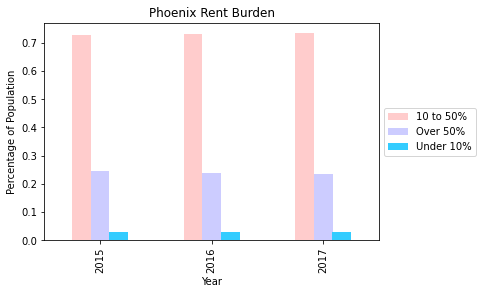

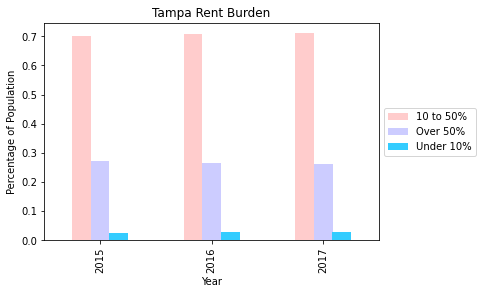

In [119]:
def rent_burden(df):
    df=df.copy()
    under10 = df.rent_under_10_percent
    tento50 = df.rent_40_to_50_percent + df.rent_35_to_40_percent + df.rent_30_to_35_percent+ df.rent_25_to_30_percent + df.rent_20_to_25_percent + df.rent_15_to_20_percent + df.rent_10_to_15_percent
    over50 = df.rent_over_50_percent
    allrentburdens=under10+tento50+over50
    return (under10.astype(float).sum()/allrentburdens.astype(float).sum(),
            tento50.astype(float).sum()/allrentburdens.astype(float).sum(),
            over50.astype(float).sum()/allrentburdens.astype(float).sum())

phoenix_rent_burden_df=pd.DataFrame()
tampa_rent_burden_housing_df=pd.DataFrame()
for year in range(2015,2018):
    under10_rent_phoenix,tento50_rent_phoenix,over50_rent_phoenix=rent_burden(acs_all_phoenix[acs_all_phoenix["Year"]==year])
    under10_rent_tampa,tento50_rent_tampa,over50_rent_tampa=rent_burden(acs_all_tampa[acs_all_tampa["Year"]==year])
    phoenix_rent_burden_df=phoenix_rent_burden_df.append({
        "Year": str(year),
        "Under 10%": under10_rent_phoenix,
        "10 to 50%": tento50_rent_phoenix,
        "Over 50%": over50_rent_phoenix
    }, ignore_index=True)
    tampa_rent_burden_housing_df=tampa_rent_burden_housing_df.append({
        "Year": str(year),
        "Under 10%": under10_rent_tampa,
        "10 to 50%": tento50_rent_tampa,
        "Over 50%": over50_rent_tampa
    },ignore_index=True)
phoenix_rent_burden_df.index=[2015,2016,2017]
phoenix_rent_burden_df.plot.bar(color=["#ffcccc","#ccccff","#33ccff"])
plt.title('Phoenix Rent Burden', color='black')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Year")
plt.ylabel("Percentage of Population")

tampa_rent_burden_housing_df.index=[2015,2016,2017]
tampa_rent_burden_housing_df.plot.bar(color=["#ffcccc","#ccccff","#33ccff"])
plt.title('Tampa Rent Burden', color='black')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel("Year")
plt.ylabel("Percentage of Population")